In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

Ex. 0.: Please get yourself familiar with the data.

In [155]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [156]:
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Ex. 1.: Please follow the steps below.

divide the data into parameters (X) and labels/classes (y)

create theta vector

add a row with values '1' on the top of the X matrix

normalize features of X matrix

In [157]:
X = data.values[:, :2].T
y = data.values[:, 2:].T

In [158]:
theta = np.zeros((X.shape[0]+1, 1))
X = np.concatenate([np.ones([1, X.shape[1]]), X])
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

Ex. 2.: Please plot the loaded data in the graph (using scatter plot). Can be both: a 2D plot with marks colored regarding to the class or a 3D plot with the class showed as 3rd dimension.

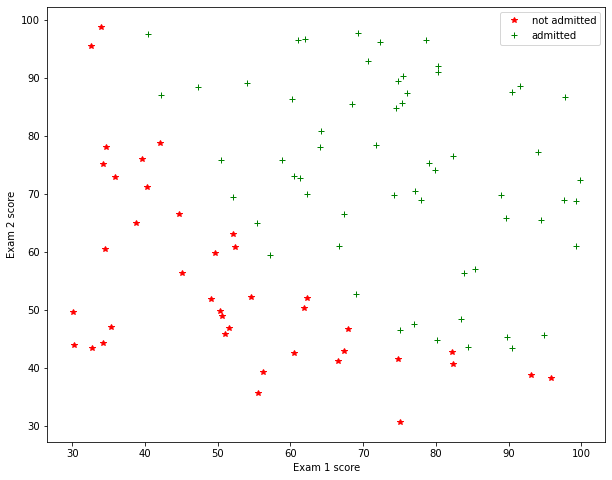

In [159]:
plt.figure(figsize=[10,8])
plt.plot(data[data["Admitted"] == 0]["Exam 1"], data[data["Admitted"] == 0]["Exam 2"], "r*", label = "not admitted")
plt.plot(data[data["Admitted"] == 1]["Exam 1"], data[data["Admitted"] == 1]["Exam 2"], "g+", label = "admitted")
plt.legend()
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.show()


Ex. 3.: Earlier, we said that we want our $h_θ(x)$ classifier to match the property:

In [160]:
def sig(t):
    return 1/(1+np.exp(-t))

Ex. 4.: Using the function np.arange or np.linspace, please generate data from the range [-5.5], step 0.5 and check the correct operation of the implemented function by plotting it.

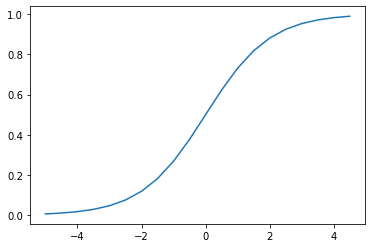

In [161]:
plt.plot(np.arange(-5,5,0.5),sig(np.arange(-5,5,0.5)))
plt.show()

Ex. 5. Based on the above formulas, please implement the cost function J (recommended vectorized solution):

In [162]:
def cost(theta, X, y):
    return np.sum(-(y*np.log(sig(theta.T@X)))-((1-y)*np.log(1 - sig(theta.T@X))))/(len(X[0]))

In [163]:
theta = np.zeros((X.shape[0], 1))
print(cost(theta=theta, X=X, y=y))


0.6931471805599453


Ex. 6.: Please implement simple gradient function:

In [167]:
def simple_gradient(X, y, theta, alpha, it):
    # it - number of iterations
    for i in range(it):
        sigmoid = sig(theta.T@X)
        grad = np.sum((-y/(sigmoid+1e-5) + (1-y)/(1-sigmoid+1e-5))*sigmoid*(1-sigmoid)*X,axis=1)
        grad.shape = [grad.shape[0],1]
        theta = theta - alpha*grad
    
    return theta#, cost
theta = simple_gradient(X,y,theta,0.01,150)
print(theta)

[[nan]
 [nan]
 [nan]]


C:\Users\nikos\AppData\Local\Temp/ipykernel_8172/2840172099.py:5: RuntimeWarning: divide by zero encountered in true_divide
  grad = np.sum((-y/sigmoid + (1-y)/(1-sigmoid))*sigmoid*(1-sigmoid)*X,axis=1)
C:\Users\nikos\AppData\Local\Temp/ipykernel_8172/2840172099.py:5: RuntimeWarning: invalid value encountered in true_divide
  grad = np.sum((-y/sigmoid + (1-y)/(1-sigmoid))*sigmoid*(1-sigmoid)*X,axis=1)
C:\Users\nikos\AppData\Local\Temp/ipykernel_8172/2840172099.py:5: RuntimeWarning: invalid value encountered in multiply
  grad = np.sum((-y/sigmoid + (1-y)/(1-sigmoid))*sigmoid*(1-sigmoid)*X,axis=1)


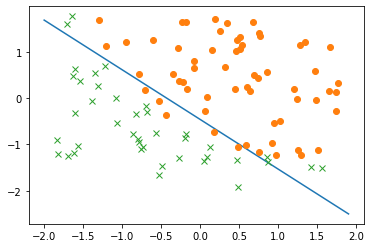

In [166]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.figure()
plt.plot(x1, x2)
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'o')
plt.plot(X1_0, X2_0, 'x')
plt.show()